# Gift Wrapping Algorithm for Convex Hull
### This implementation finds the convex hull of a set of randomly generated 2D points.

In [4]:
from matplotlib import pyplot as plt
from random import randint

In [5]:
def create_points(ct, min=0, max=50):
    """Create a list of random 2D points."""
    return [[randint(min, max), randint(min, max)] for _ in range(ct)]

In [6]:
def leftmost(points):
    """Find the leftmost point (with the lowest x-coordinate)."""
    minim = 0
    for i in range(1, len(points)):
        # Compare x-coordinates
        if points[i][0] < points[minim][0] or (points[i][0] == points[minim][0] and points[i][1] > points[minim][1]):
            minim = i
    return minim

In [7]:
def det(p1, p2, p3):
    """Calculate the determinant for three points."""
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

In [8]:
# Create random points
num_points = 10
points = create_points(num_points)

# Initialize variables for convex hull
hull = []
l = leftmost(points)
leftMost = points[l]
currentVertex = leftMost
hull.append(currentVertex)
nextVertex = points[1]
index = 2
nextIndex = -1

In [9]:
# Compute the convex hull
while True:
    c0 = currentVertex
    c1 = nextVertex

    checking = points[index]
    c2 = checking

    # Calculate the cross product to determine turn direction
    crossProduct = det(currentVertex, nextVertex, checking)
    if crossProduct < 0:
        nextVertex = checking
        nextIndex = index
    index += 1
    if index == len(points):
        if nextVertex == leftMost:
            break
        index = 0
        hull.append(nextVertex)
        currentVertex = nextVertex
        nextVertex = leftMost

In [10]:
def scatter_plot(coords, convex_hull=None):
    """Plot the points and convex hull."""
    xs, ys = zip(*coords)
    plt.scatter(xs, ys)

    if convex_hull:
        for i in range(1, len(convex_hull) + 1):
            if i == len(convex_hull):
                i = 0  # Wrap around for the last point
            c0 = convex_hull[i - 1]
            c1 = convex_hull[i]
            plt.plot((c0[0], c1[0]), (c0[1], c1[1]), 'r')

    plt.show()

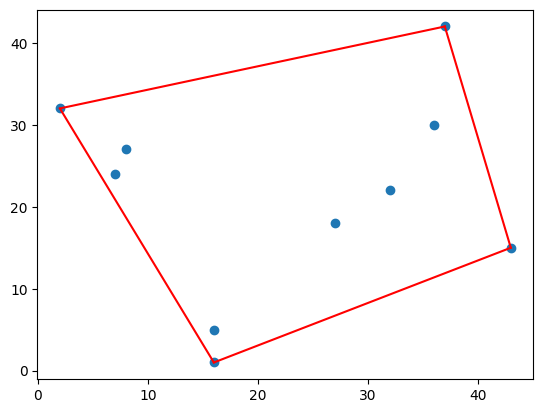

In [11]:
# Visualize the points and convex hull
scatter_plot(points, hull)

# References

[Computing the Convex Hull in Python |
Gift Wrapping algorithm](https://medium.com/@errazkim/computing-the-convex-hull-in-python-60a6087e0faa)